<a href="https://colab.research.google.com/github/saidVaraMAEA/MineriadeDatosMAEA2026/blob/main/Proyecto_Final_de_Miner%C3%ADa_de_Datos_Said_Vara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL – CRISP-DM**
## Minería de Datos
### Por: Pedro Said Vara Chacón
### Asesor: Dr. Gerónimo Quiñonez Barraza
### Maestría en Estadística Aplicada
### Facultad de Ciencias Exactas UJED
### Fecha: Febrero 2026

## 1. Business Understanding
### 1.1 Contexto del problema

El sector hotelero enfrenta pérdidas económicas derivadas de cancelaciones de reservas. Estas cancelaciones afectan la planificación operativa, la ocupación y los ingresos esperados.
Anticipar qué reservas tienen mayor probabilidad de cancelarse permitiría al hotel implementar estrategias preventivas como políticas de depósito, sobreventa controlada o campañas de confirmación anticipada.

### 1.2 Definición del problema

El problema consiste en predecir si una reserva será cancelada utilizando información disponible al momento de realizar la reservación.
La variable a utilizar es `is_canceled`

### 1.3 Objetivo general

Construir y comparar modelos de clasificación capaces de predecir la probabilidad de cancelación de una reserva hotelera.

### 1.4 Objetivos específicos

1. Analizar las características del dataset.
2. Identificar variables relevantes.
3. Entrenar distintos modelos de clasificación.
4. Evaluar su desempeño.
5. Proponer una posible aplicación del modelo en un entorno real.

### 1.5 Métricas de evaluación

Se utilizarán:
* Accuracy
* AUC
* Recall

El AUC será la métrica principal debido a su capacidad para evaluar la discriminación entre clases incluso en presencia de desbalance.



# 2. Data Understanding
## 2.1 Descripción del conjunto de datos


Para abordar el problema planteado, se utiliza un conjunto de datos de reservas hoteleras obtenido de la plataforma Kaggle.

A continuación, se muestran las primeras observaciones del dataset para visualizar su estructura inicial.

In [2]:
import pandas as pd

df = pd.read_csv("/content/hotel_bookings.csv")

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03




El dataset contiene suficientes datos, que describen características relacionadas con la reserva, tipo de cliente, condiciones de hospedaje y comportamiento histórico.
La variable objetivo como se mencionó anteriormente es:
is_canceled, variable binaria donde:
* 1 indica cancelación y
* 0 indica que la reserva se concretó.

## 2.2 Tipos de variables



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

El dataset contiene 32 variables que se clasifican en:

* Variables categóricas (ej. tipo de hotel, segmento de mercado, tipo de depósito, país).
* Variables numéricas de conteo y continuas (ej. días de anticipación, noches de estancia, tarifa diaria promedio).
* Variables binarias (ej. is_canceled, is_repeated_guest).
* Variables identificadoras como agent y company.

## 2.3 Dimensiones del dataset



In [4]:
df.shape

(119390, 32)

El dataset presenta:

* 119,390 filas
* 32 columnas

Lo cual proporciona un volumen suficiente para entrenar modelos de clasificación sin riesgo de sobreajuste por escasez de datos.

## 2.4 Calidad de los datos


In [5]:
df.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Se analizaron los valores faltantes en el dataset para identificar posibles problemas de calidad de datos. Estos serán tratados en la fase de preparación.

## 2.5 Distribución de la variable objetivo



In [6]:
df['is_canceled'].value_counts()
df['is_canceled'].value_counts(normalize=True)


,proportion
is_canceled,
0,0.629584
1,0.370416


Aproximadamente el 37% de las reservas fueron canceladas, lo que representa un desbalance moderado entre clases. Esta distribución será considerada al momento de evaluar el desempeño de los modelos.



## 2.6 Análisis Exploratorio Bivariado

Con el objetivo de identificar patrones asociados a la cancelación de reservas, se analizaron relaciones entre la variable objetivo y algunas variables predictoras relevantes.

### 2.6.1 Lead Time y Cancelación

Se analizó el tiempo de anticipación según el estado de la reserva:

In [7]:
df.groupby('is_canceled')['lead_time'].mean()


,lead_time
is_canceled,
0,79.984687
1,144.848815


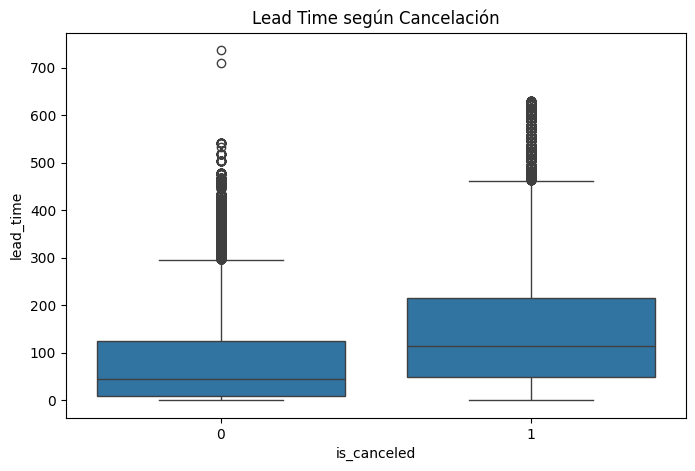

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time según Cancelación')
plt.show()


La mayor dispersión observada en reservas canceladas sugiere mayor variabilidad en el comportamiento de clientes que reservan con alta anticipación, lo cual podría estar asociado a cambios en planes de viaje.

# 3. Data Preparation

## 3.1 Eliminación de variables con fuga de información

Se eliminaron las siguientes variables:
* reservation_status
* reservation_status_date

Estas variables contienen información posterior al evento de cancelación, lo que generaría fuga de información (data leakage). Su inclusión permitiría al modelo acceder indirectamente al resultado final, invalidando la evaluación predictiva.

In [9]:
df = df.drop(['reservation_status', 'reservation_status_date'],
             axis=1,
             errors='ignore')
df.shape


(119390, 30)

## 3.2 Manejo de valores faltantes



In [10]:
df = df.drop(['agent', 'company'], axis=1, errors='ignore')

df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna(df['country'].mode()[0])


Con base en el análisis de calidad de datos previamente realizado, se eliminaron variables con alto porcentaje de valores faltantes y se imputaron valores en aquellas con baja proporción de ausencia para conservar la mayor cantidad de información posible.

## 3.3 Separación de variables predictoras y variable objetivo

In [11]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']


Se definieron las variables predictoras (X) y la variable objetivo (y), correspondiente a la cancelación de la reserva.

## 3.4 Codificación de variables categóricas


In [12]:
X = pd.get_dummies(X, drop_first=True)
X.shape
X.head()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,737,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,7,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,13,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,14,2015,27,1,0,2,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False


Después de la codificación, el número de variables aumentó debido a la transformación de variables categóricas en variables binarias.

## 3.5 División entrenamiento-prueba


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((95512, 245), (23878, 245))

In [14]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(is_canceled
 0    0.629586
 1    0.370414
 Name: proportion, dtype: float64,
 is_canceled
 0    0.629575
 1    0.370425
 Name: proportion, dtype: float64)

Tras la codificación de variables categóricas, el conjunto de datos quedó conformado por 245 variables predictoras. Se realizó una partición 80/20 estratificada, obteniéndose 95,512 observaciones para entrenamiento y 23,878 para prueba. Se confirmó que la proporción de clases se mantuvo consistente en ambos conjuntos.

## 3.6 Escalado de variables

Se realizó estandarización de las variables predictoras con el fin de evitar que diferencias de escala influyeran en el desempeño de modelos sensibles a magnitud.



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((95512, 245), (23878, 245))

El escalado se ajustó únicamente con los datos de entrenamiento y posteriormente se aplicó al conjunto de prueba, evitando así fuga de información.

El escalado no altera la estructura del dataset, únicamente transforma la magnitud de las variables.

# 4. Modeling

En esta fase se entrenan distintos modelos de clasificación con el objetivo de comparar su desempeño en la predicción de cancelaciones.
Se evaluarán los siguientes modelos:
* Regresión Logística
* Random Forest
* Support Vector Machine (SVM)

## 4.1 Regresión Logística

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Predicciones

In [17]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]


# 4.2 Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Predicciones

In [19]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]


# 5. Evaluation

Se evaluarán los modelos utilizando:
* Accuracy
* Recall
* AUC

In [20]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_prob_log))
print("-"*40)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))
print("-"*40)


Regresión Logística
Accuracy: 0.8185358907781222
Recall: 0.6661390616167326
AUC: 0.8960697958743638
----------------------------------------
Random Forest
Accuracy: 0.890652483457576
Recall: 0.7993216506500848
AUC: 0.9544782785578528
----------------------------------------


La regresión logística obtuvo un Accuracy de 81.85%, lo que indica que el modelo clasifica correctamente la mayoría de las reservas.
Sin embargo, el Recall de 66.61% muestra que el modelo logra identificar aproximadamente dos terceras partes de las reservas que efectivamente fueron canceladas.

El valor AUC de 0.8961 indica una buena capacidad discriminativa entre reservas canceladas y no canceladas.

Ahora el modelo fuerte:

El modelo Random Forest presentó un Accuracy de 89.07%, superior al obtenido por la regresión logística.
El Recall alcanzó 79.93%, lo que implica una mejora considerable en la identificación de reservas canceladas, aspecto clave para el problema de negocio.

El valor AUC de 0.9545 indica una excelente capacidad discriminativa, evidenciando que el modelo separa adecuadamente ambas clases.

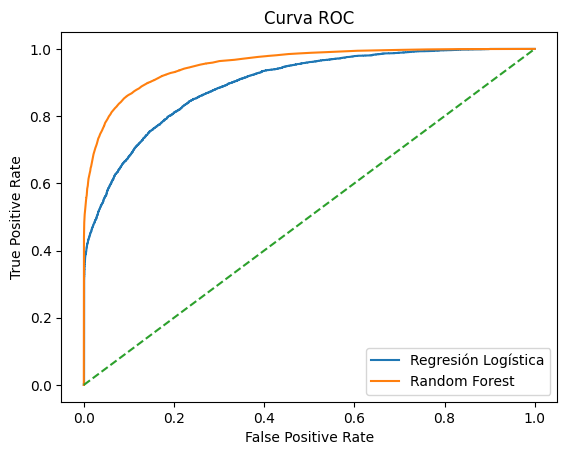

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_log, tpr_log, label='Regresión Logística')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

La curva ROC muestra que el modelo Random Forest domina consistentemente a la regresión logística, confirmando su mayor capacidad discriminativa.

## Comparación de Modelos y Selección Final

Comparando ambos modelos, Random Forest supera consistentemente a la regresión logística en las tres métricas evaluadas (Accuracy, Recall y AUC). La mejora en Recall implica una mayor capacidad para detectar reservas que efectivamente serán canceladas, reduciendo el riesgo de subestimar eventos críticos.

Dado que el objetivo del negocio es anticipar cancelaciones para reducir pérdidas económicas, la mejora en Recall resulta particularmente relevante, ya que permite identificar un mayor porcentaje de reservas con alto riesgo de cancelación.

Por lo tanto, se selecciona Random Forest como modelo final para la predicción de cancelaciones.

## Interpretación del Modelo Seleccionado



### Matriz de confusión

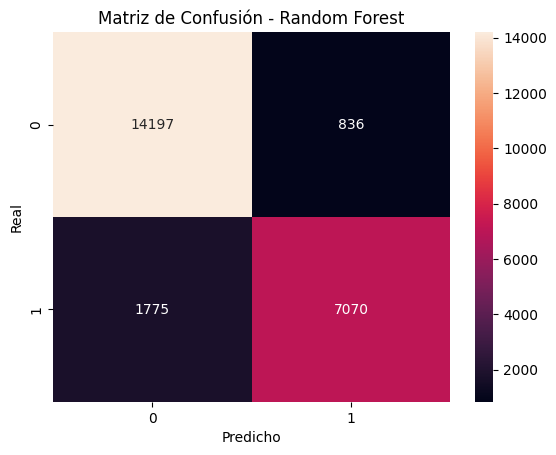

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Desde una perspectiva operativa, los 1,775 falsos negativos representan cancelaciones que no fueron anticipadas, mientras que los 836 falsos positivos implicarían posibles intervenciones innecesarias. No obstante, el modelo logra identificar aproximadamente 4 de cada 5 cancelaciones reales, lo que constituye un resultado sólido para fines preventivos.


Como parte del análisis del modelo final (Random Forest), se evaluó la importancia relativa de las variables predictoras para identificar cuáles influyen más en la predicción de cancelaciones.

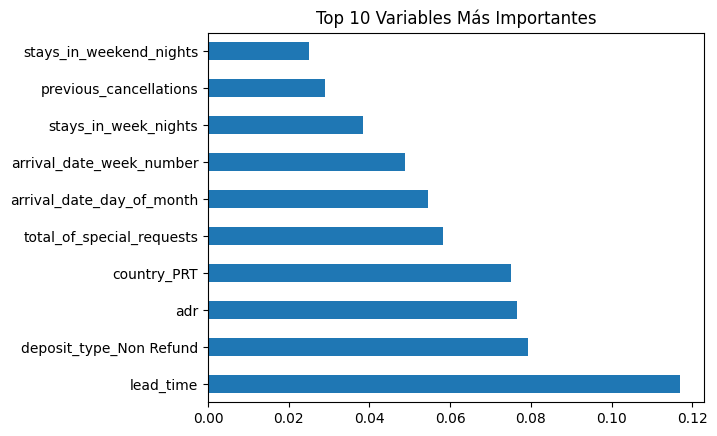

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Variables Más Importantes')
plt.show()

Entre las variables con mayor importancia destacan:
* lead_time, lo cual sugiere que el tiempo de anticipación es un factor determinante en la probabilidad de cancelación. Reservas realizadas con mayor anticipación tienden a presentar mayor incertidumbre en la planificación del cliente.
* deposit_type, indicando que el tipo de depósito influye significativamente en el compromiso del cliente con la reserva.
* total_of_special_requests (si aparece entre las importantes), lo que podría reflejar mayor intención de estancia cuando el cliente personaliza su experiencia.

Estos resultados refuerzan la coherencia del modelo desde una perspectiva operativa, ya que las variables más influyentes tienen interpretación lógica en el contexto del negocio hotelero.

# 6. Deployment

## 6.1 Implementación del modelo

El modelo seleccionado fue Random Forest, debido a su superior desempeño en Accuracy, Recall y AUC.
Este modelo puede integrarse en el sistema de gestión de reservas del hotel para estimar, en tiempo real, la probabilidad de cancelación de una nueva reserva.
El flujo de implementación sería:
* Captura de datos de la reserva.
* Aplicación del mismo proceso de transformación (codificación y escalado).
* Generación de probabilidad de cancelación.
* Toma de decisiones basada en el nivel de riesgo.

Si bien el modelo presenta alto desempeño, su efectividad depende de la estabilidad de los patrones históricos; cambios estructurales en el comportamiento del mercado podrían requerir reentrenamiento o ajustes adicionales.

## 6.2 Aplicaciones prácticas

El modelo puede utilizarse para:
* Aplicar políticas de depósito en reservas de alto riesgo.
* Implementar recordatorios o confirmaciones anticipadas.
* Ajustar estrategias de sobreventa controlada.
* Optimizar la planificación operativa del hotel.

Dado que el modelo presenta un AUC superior a 0.95, demuestra alta capacidad para distinguir entre reservas canceladas y no canceladas, lo que lo convierte en una herramienta confiable para la toma de decisiones.

## 6.3 Mantenimiento y actualización
Se recomienda:
* Reentrenar el modelo periódicamente con nuevos datos.
* Monitorear cambios en el comportamiento de cancelación.
* Evaluar desempeño ante cambios económicos o estacionales.

Esto garantiza que el modelo mantenga su capacidad predictiva en el tiempo.

# 7. Conclusiones

El objetivo de este proyecto fue desarrollar un modelo capaz de anticipar la cancelación de reservas hoteleras, con la intención de generar información útil para la toma de decisiones en el negocio.

A lo largo del análisis se exploraron los datos, se identificaron patrones relevantes y se preparó el conjunto de información para entrenar distintos modelos de clasificación. El dataset presentó un desbalance moderado, con aproximadamente 37% de reservas canceladas, lo cual fue considerado durante la evaluación de los modelos.

Entre los hallazgos más relevantes, se observó que variables relacionadas con el tiempo de anticipación de la reserva mostraron asociación con la probabilidad de cancelación, lo que tiene sentido desde una perspectiva práctica: reservas hechas con mucha anticipación pueden estar más expuestas a cambios en los planes del cliente.

En cuanto al desempeño predictivo, el modelo Random Forest superó a la regresión logística en todas las métricas evaluadas. Con un AUC de 0.9545, el modelo demuestra una excelente capacidad para diferenciar entre reservas que serán canceladas y aquellas que se concretarán. Además, logró identificar cerca del 80% de las cancelaciones reales, lo que representa un avance importante para fines operativos.

Si bien el modelo presenta alto desempeño, su efectividad depende de la estabilidad de los patrones históricos; cambios estructurales en el comportamiento del mercado podrían requerir reentrenamiento o ajustes adicionales.

Desde la perspectiva del negocio, contar con una herramienta que permita estimar el riesgo de cancelación antes de la fecha de llegada puede traducirse en mejores estrategias de confirmación, ajustes en políticas de depósito o incluso decisiones de sobreventa controlada. En otras palabras, el modelo no solo tiene valor estadístico, sino también valor estratégico.

Como limitación del estudio, no se realizó un ajuste exhaustivo de hiperparámetros ni validación cruzada, por lo que el desempeño del modelo podría optimizarse mediante técnicas adicionales como Grid Search o Random Search. Esto representa una línea natural de mejora futura.

Metodológicamente, el proyecto siguió las fases del enfoque CRISP-DM, asegurando un proceso estructurado que va desde la comprensión del problema hasta la posible implementación del modelo. Esto garantiza que el análisis no sea únicamente técnico, sino también alineado con un objetivo claro de negocio.

El modelo desarrollado demuestra que la minería de datos aplicada a información histórica de reservas puede convertirse en una herramienta estratégica para la gestión de ingresos y reducción de pérdidas por cancelaciones.

# Bibliografía

### Metodología CRISP-DM
Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000). CRISP-DM 1.0: Step-by-step data mining guide. SPSS.

### Minería de datos y machine learning
Han, J., Pei, J., & Kamber, M. (2011). Data mining: Concepts and techniques (3rd ed.). Morgan Kaufmann.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An introduction to statistical learning (2nd ed.). Springer.
### Random Forest
Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32.
### Regresión Logística
Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied logistic regression (3rd ed.). Wiley.
### Scikit-learn
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.